<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

 - [**Introduction**](#1)

 - [**Explore**](#2)

 - [**Pre-processing and feature selection**](#3)
    
 - [**Modelling and Evaluation**](#4)
    - [**kNN**](#4_1)
    - [**XGBoost**](#4_2)
    - [**Random Forest**](#4_3)
    - [**LSTM**](#4_4)
 - [**Evaluate**](#5)
 - [**Conclusion**](#6)
   

<a id='1'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Introduction</b>

The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries. The dataset contains the summary of the 14 batteries.

Variables:

 - Cycle Index: number of cycle
 - F1: Discharge Time (s)
 - F2: Time at 4.15V (s)
 - F3: Time Constant Current (s)
 - F4: Decrement 3.6-3.4V (s)
 - F5: Max. Voltage Discharge (V)
 - F6: Min. Voltage Charge (V)
 - F7: Charging Time (s)
 - Total time (s)
 - RUL: target

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Explore</b>

In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Battery_RUL.csv')

In [ ]:
df.head()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)  Charging time (s)   RUL
0          1.0             2595.30             1151.488500                      3.670                    3.211           5460.001                    6755.01           10777.82  1112
1          2.0             7408.64             1172.512500                      4.246                    3.220           5508.992                    6762.02           10500.35  1111
2          3.0             7393.76             1112.992000                      4.249                    3.224           5508.993                    6762.02           10420.38  1110
3          4.0             7385.50             1080.320667                      4.250                    3.225           5502.016                    6762.02           10322.81  1109
4          6.0            65022.75            29813.487000                      4.290                    3.398           5480.992                   53213.54           56699.65  1107

In [ ]:
df['Battery ID']= 0
batteries=[]
ID=1
for rul in df['RUL']:
    batteries.append(ID)
    if rul == 0:
        ID+=1
        continue
df['Battery ID'] = batteries

In [ ]:
sensor_list = df.columns[1:-2]
sensor_list

Index(['Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
 9   Battery ID                 15064 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 1.1 MB


In [ ]:
df.describe()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)  Charging time (s)           RUL    Battery ID
count  15064.000000        15064.000000            15064.000000               15064.000000             15064.000000       15064.000000               15064.000000       15064.000000  15064.000000  15064.000000
mean     556.155005         4581.273960             1239.784672                   3.908176                 3.577904        3768.336171                5461.266970       10066.496204    554.194172      7.486126
std      322.378480        33144.012077            15039.589269                   0.091003                 0.123695        9129.552477               25155.845202       26415.354121    322.434514      4.023541
min        1.000000            8.690000          -397645.908000                   3.043000                 3.022000        -113.584000                   5.980000           5.980000      0.000000      1.000000
25%      271.000000         1169.310000              319.600000                   3.846000                 3.488000        1828.884179                2564.310000        7841.922500    277.000000      4.000000
50%      560.000000         1557.250000              439.239471                   3.906000                 3.574000        2930.203500                3824.260000        8320.415000    551.000000      7.000000
75%      833.000000         1908.000000              600.000000                   3.972000                 3.663000        4088.326500                5012.350000        8763.282500    839.000000     11.000000
max     1134.000000       958320.370000           406703.768000                   4.363000                 4.379000      245101.117000              880728.100000      880728.100000   1133.000000     14.000000

In [ ]:
df.shape

(15064, 10)

In [ ]:
from sklearn.model_selection import train_test_split

# Get unique battery IDs
battery_ids = df['Battery ID'].unique()

# Perform an 80-20 split
train_battery_ids, test_battery_ids = train_test_split(battery_ids, test_size=0.2, random_state=42)

# Create train and test datasets
df_train = df[df['Battery ID'].isin(train_battery_ids)]
df_test = df[df['Battery ID'].isin(test_battery_ids)]


In [ ]:
df_train.shape

(11832, 10)

In [ ]:
df_test.shape

(3232, 10)

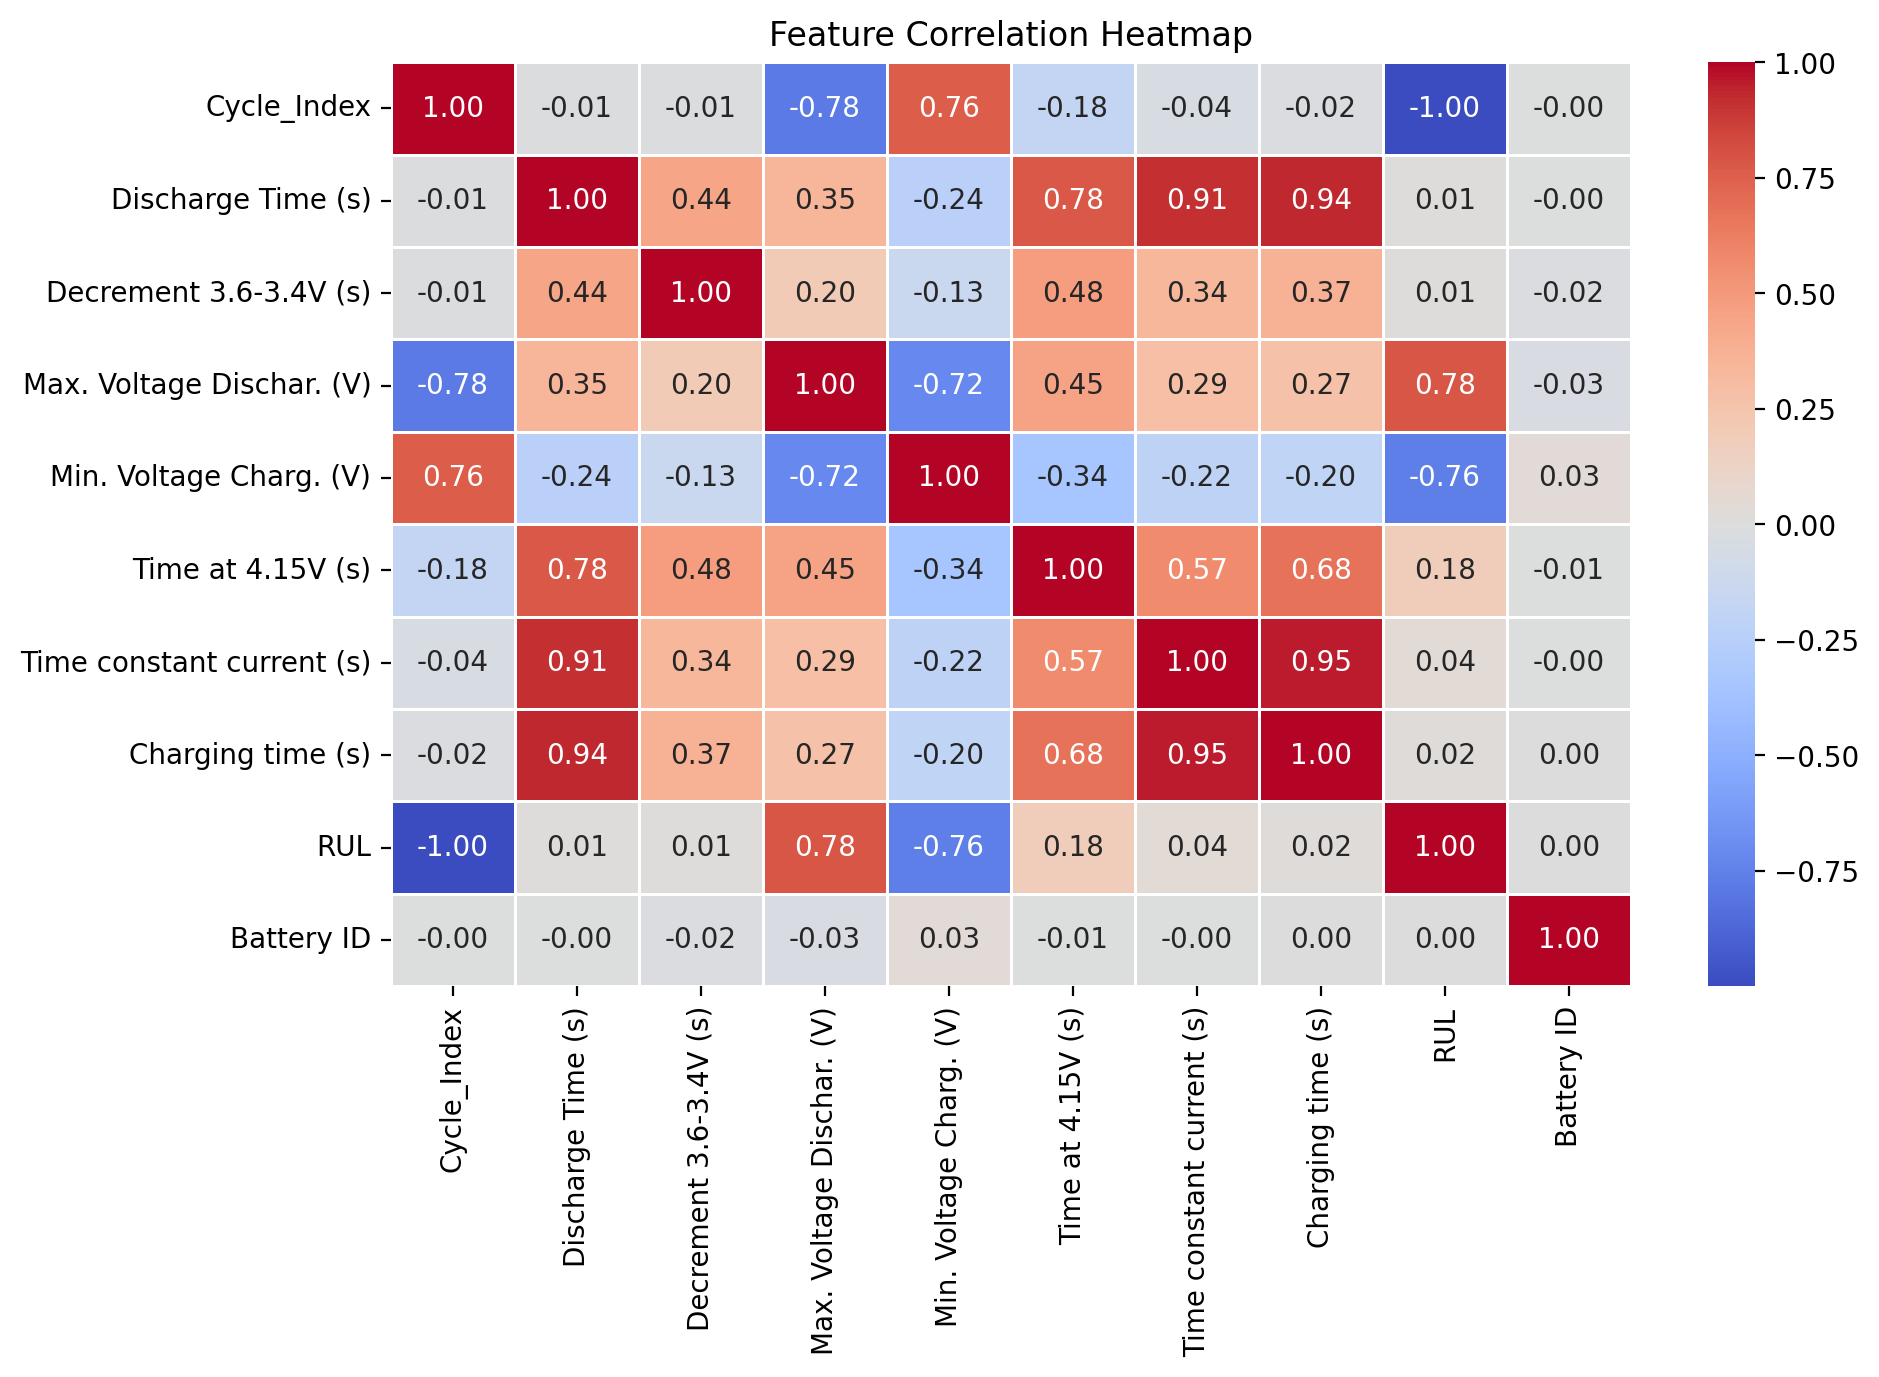

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


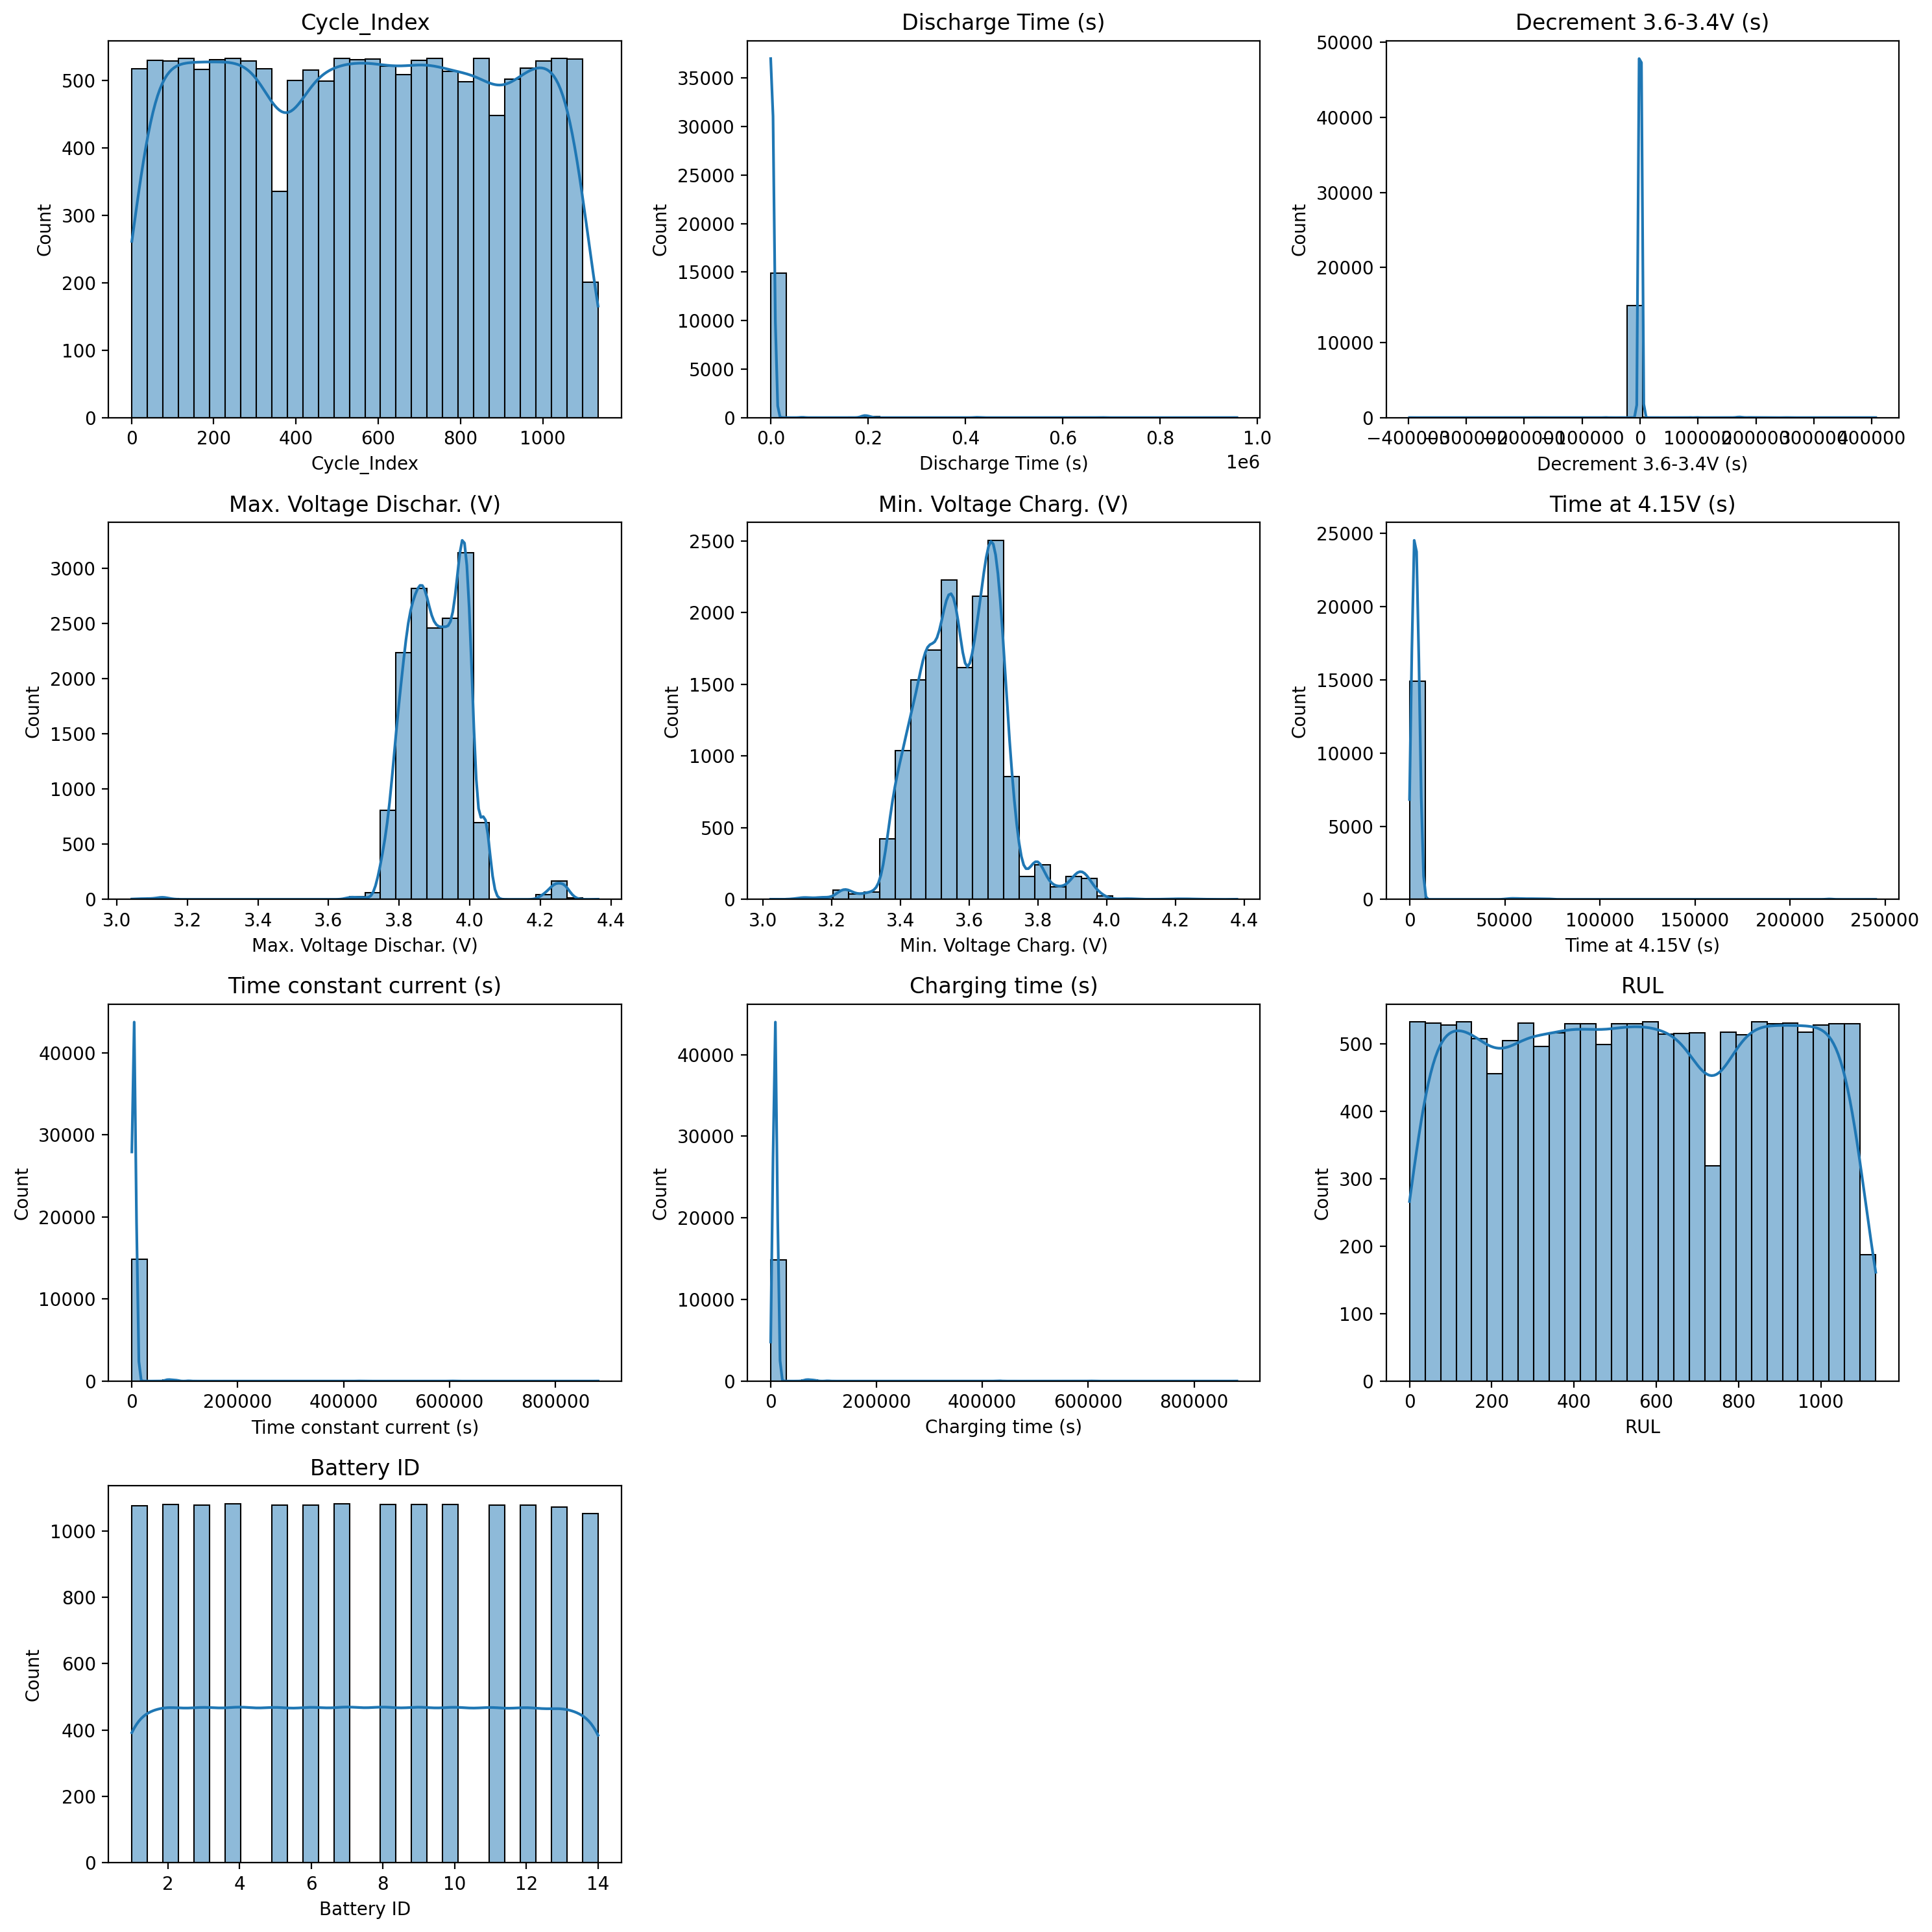

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical feature names
numlist = df.columns

# Define subplot grid size dynamically
num_features = len(numlist)
rows = (num_features // 3) + (num_features % 3 > 0)  # Auto adjust row count

# Create figure
fig = plt.figure(figsize=(15, 15))

# Loop through each feature
for i, col in enumerate(numlist):
    plt.subplot(rows, 3, i + 1)  # Adjust for total feature count
    plt.title(col, fontsize=12)
    sns.histplot(df[col], bins=30, kde=True)  # Better visualization

plt.tight_layout()
plt.show()


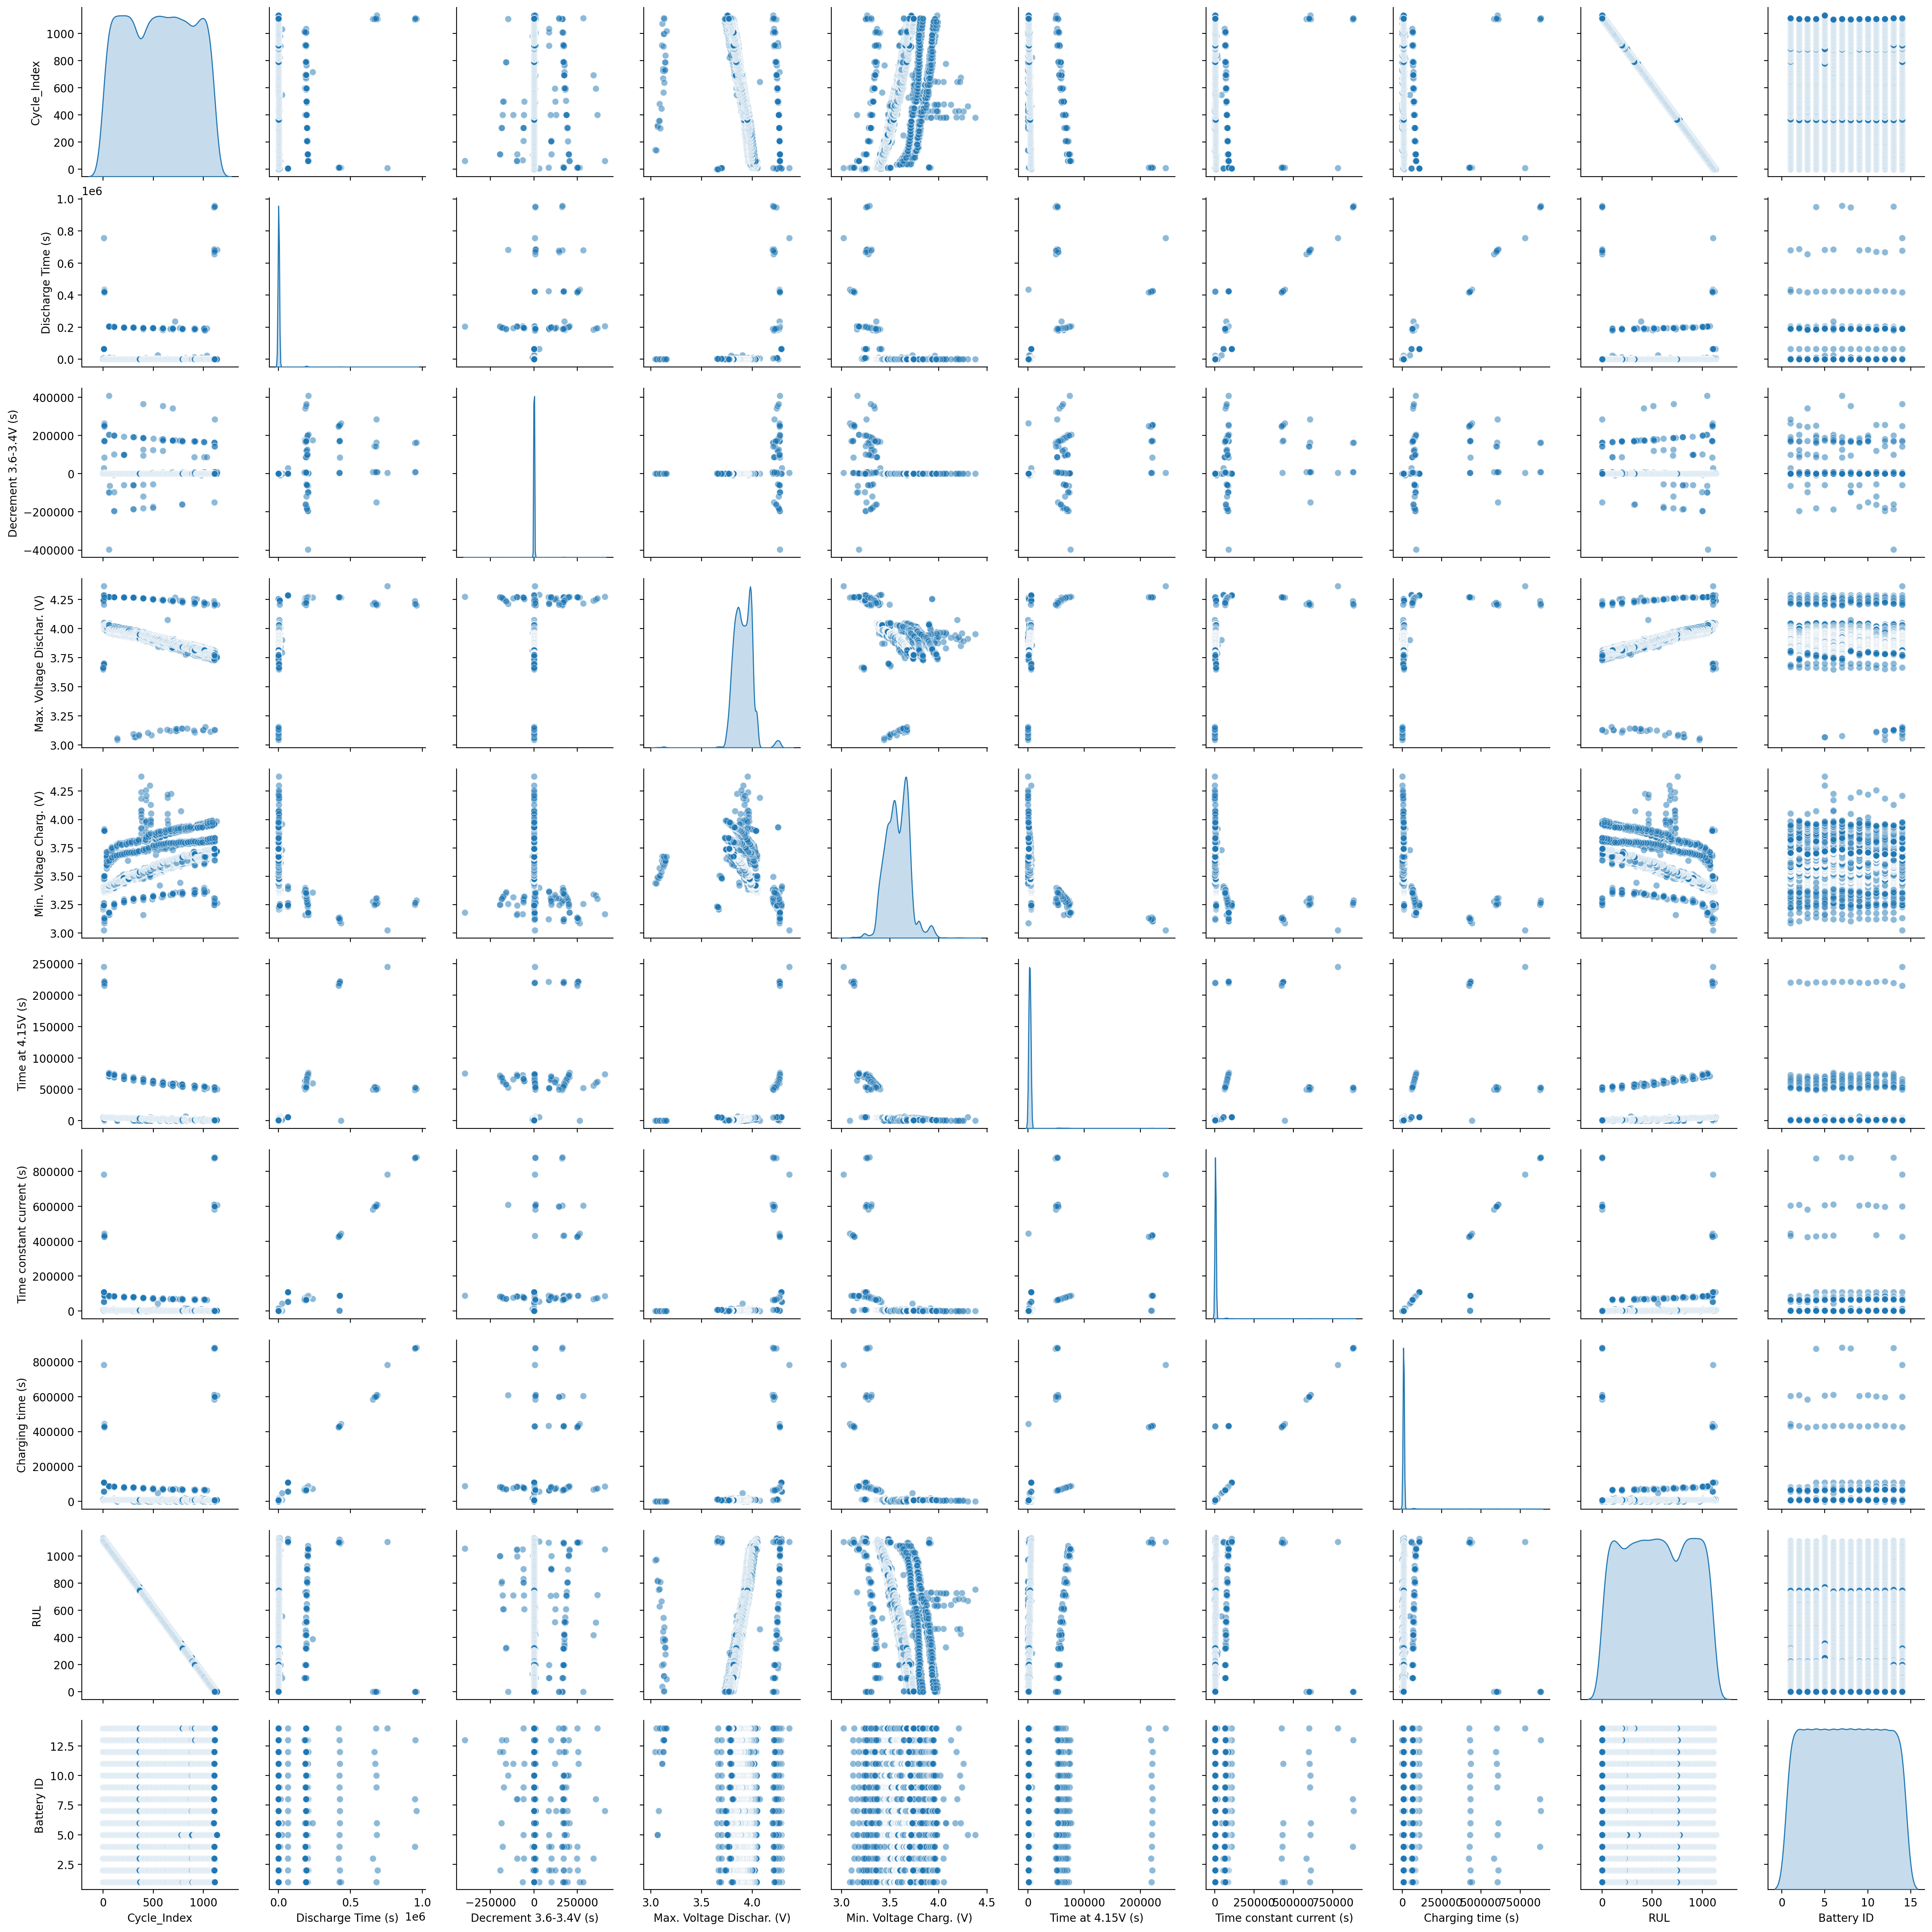

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for all numerical features
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.5})

# Show the plot
plt.show()


In [ ]:
sens_const_values = []
for feature in list(sensor_list):
    try:
        if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    except:
        pass

print(sens_const_values)
df_train.drop(sens_const_values,axis=1,inplace=True)
df_test.drop(sens_const_values,axis=1,inplace=True)

[]


In [ ]:
# Define the feature to drop
feature_to_drop = "Charging time (s)"  # Change to "Time constant current (s)" if needed

# Drop the feature from both train and test sets
df_train = df_train.drop(columns=[feature_to_drop])
df_test = df_test.drop(columns=[feature_to_drop])

print(f"Dropped Feature: {feature_to_drop}")
print(f"New Train Shape: {df_train.shape}, New Test Shape: {df_test.shape}")


Dropped Feature: Charging time (s)
New Train Shape: (11832, 9), New Test Shape: (3232, 9)


In [ ]:
list(df_train)

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'RUL',
 'Battery ID']

In [ ]:
df_train.head()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)   RUL  Battery ID
1076          1.0             2604.00             1186.495500                      3.666                    3.213           5424.991                    6706.02  1107           2
1077          2.0             7384.99             1228.496000                      4.242                    3.221           5488.000                    6727.01  1106           2
1078          3.0             7364.00             1165.519000                      4.244                    3.225           5480.989                    6720.00  1105           2
1079          4.0             7356.99             1141.027000                      4.246                    3.227           5481.027                    6720.00  1104           2
1080          6.0            64974.56             1143.328667                      4.288                    3.389           5460.000                   53233.86  1102           2

In [ ]:
features = list(df_train.columns)

In [ ]:
for feature in features:
    print(feature + " - " + str(len(df_train[df_train[feature].isna()])))

Cycle_Index - 0
Discharge Time (s) - 0
Decrement 3.6-3.4V (s) - 0
Max. Voltage Dischar. (V) - 0
Min. Voltage Charg. (V) - 0
Time at 4.15V (s) - 0
Time constant current (s) - 0
RUL - 0
Battery ID - 0


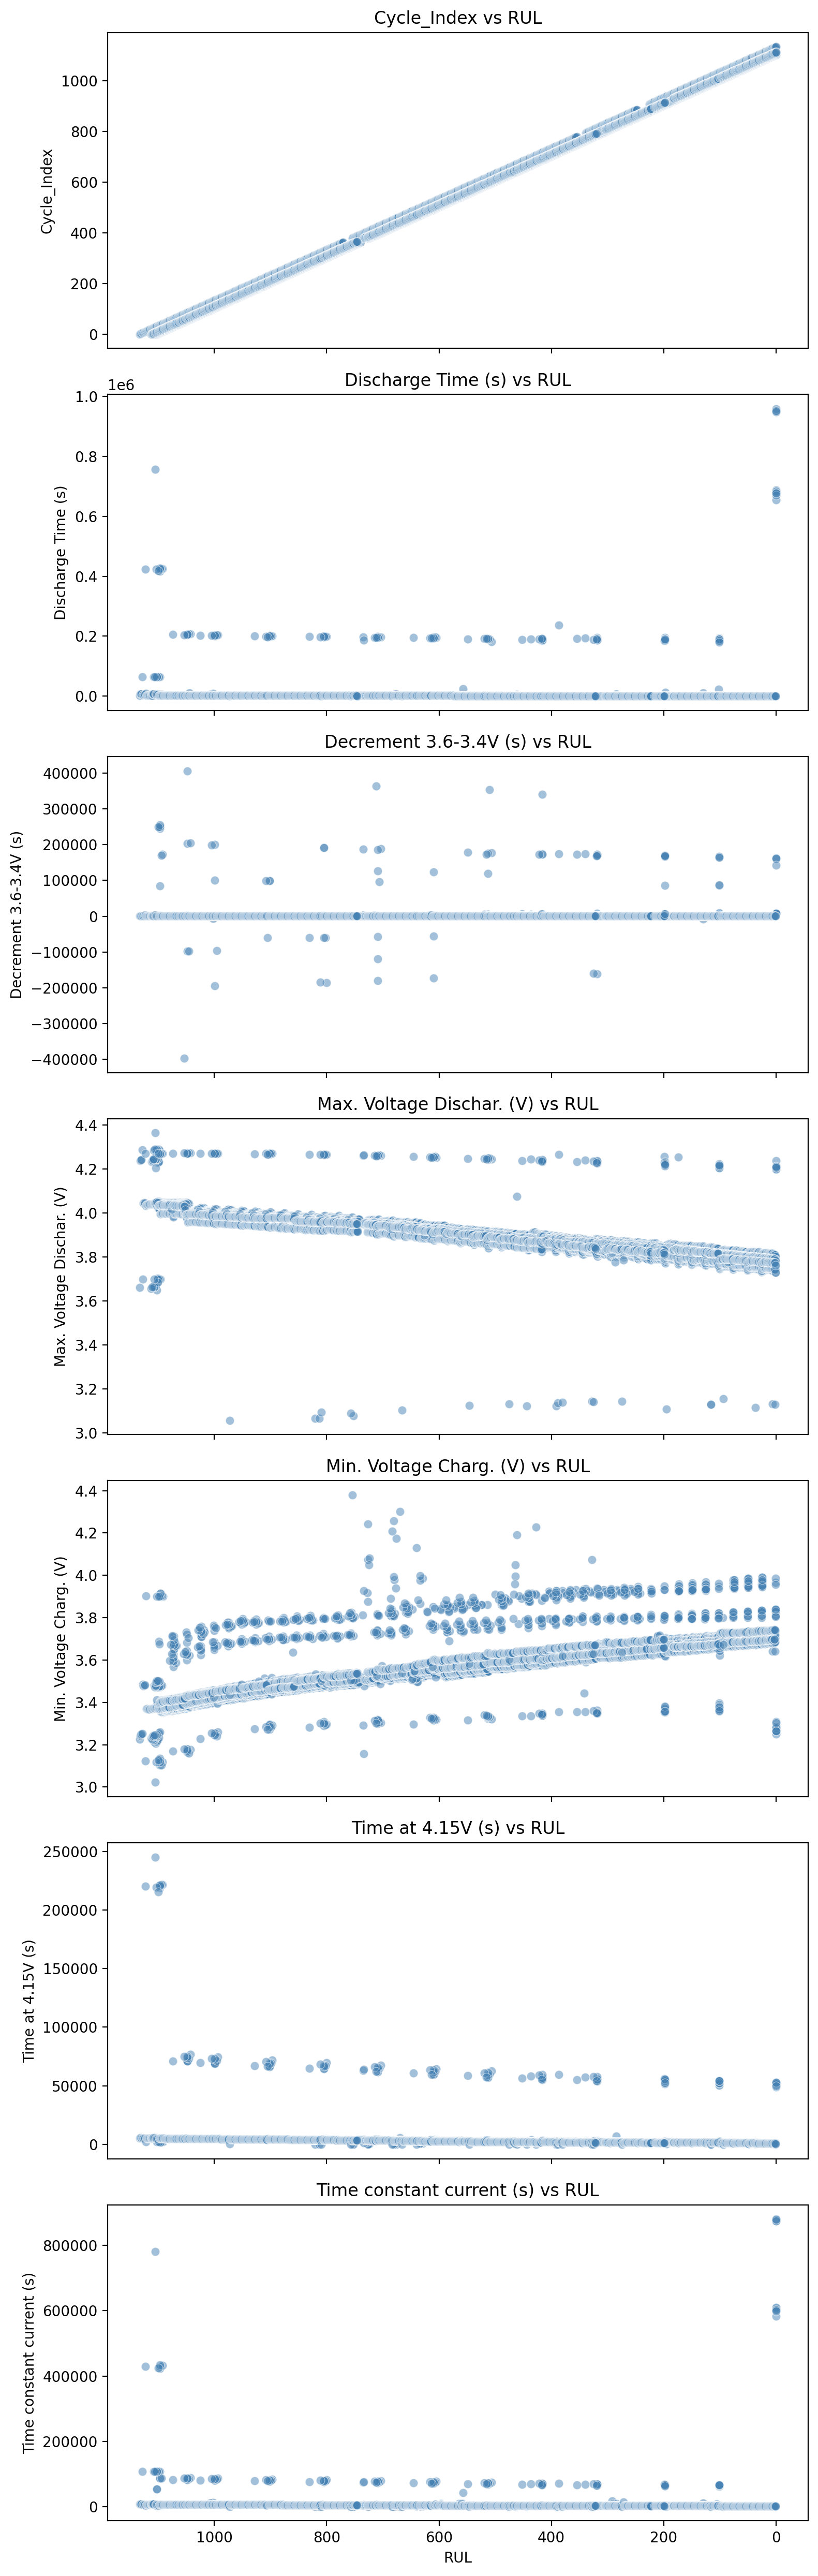

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to plot (excluding 'Battery ID' and 'RUL')
plot_items = [col for col in df_train.columns if col not in ['Battery ID', 'RUL']]

# Create subplots
fig, axes = plt.subplots(nrows=len(plot_items), ncols=1, figsize=(8, 25), sharex=True)

# Plot each feature against RUL
for i, item in enumerate(plot_items):
    sns.scatterplot(data=df_train, x='RUL', y=item, ax=axes[i], alpha=0.5, color='steelblue')
    axes[i].set_title(f"{item} vs RUL")

# Invert x-axis (since RUL decreases over time)
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()


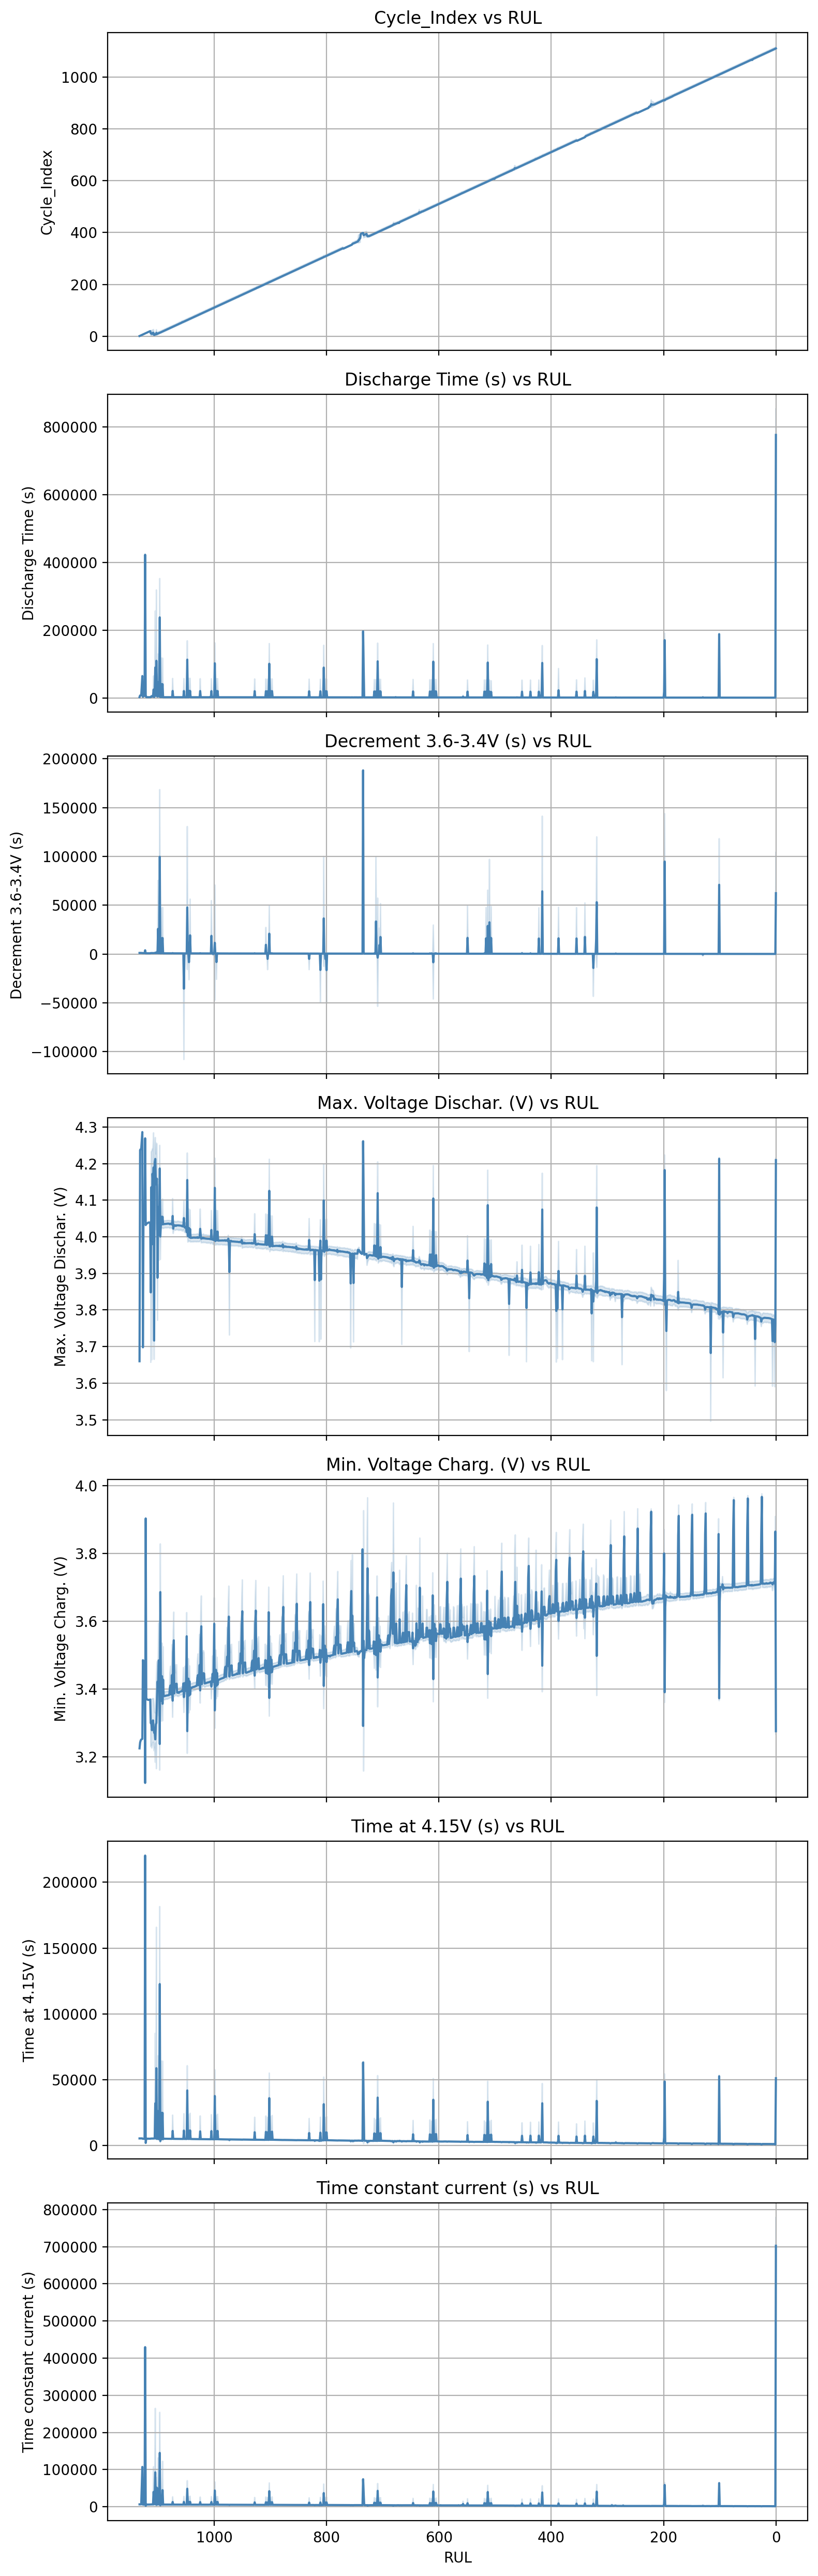

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to plot (excluding 'Battery ID' and 'RUL')
plot_items = [col for col in df_train.columns if col not in ['Battery ID', 'RUL']]

# Create subplots
fig, axes = plt.subplots(nrows=len(plot_items), ncols=1, figsize=(8, 25), sharex=True)

# Plot each feature against RUL as a line
for i, item in enumerate(plot_items):
    sns.lineplot(data=df_train, x='RUL', y=item, ax=axes[i], color='steelblue')
    axes[i].set_title(f"{item} vs RUL")
    axes[i].grid(True)  # Add grid for better readability

# Invert x-axis (since RUL decreases over time)
axes[0].invert_xaxis()

plt.tight_layout()
plt.show()


<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

In [ ]:
# awesome bit of code from https://www.kaggle.com/code/adibouayjan/house-price-step-by-step-modeling

Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
X = df_train.iloc[:,1:-2]
y = df_train.iloc[:,-1]
backward_regression(X, y)

worst_feature : Time at 4.15V (s), 0.9610798693427135 
worst_feature : Discharge Time (s), 0.7178305265391391 
worst_feature : Time constant current (s), 0.63992185639953 
worst_feature : Decrement 3.6-3.4V (s), 0.12668222455262346 

Selected Features:
['Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)']


In [ ]:
feature_names = Selected_Features[0]

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

In [ ]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [ ]:
X_train = df_train[feature_names]
y_train = df_train['RUL']

X_test = df_test[feature_names]
y_test = df_test['RUL']


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
# sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a id='4_1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>kNN</b>

In [ ]:
import time
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model_performance DataFrame if not already created
if 'model_performance' not in locals():
    model_performance = pd.DataFrame(columns=['R2 Score', 'RMSE', 'Train Time', 'Prediction Time', 'Total Time'])

# Train the KNN model
start = time.time()
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
end_train = time.time()

# Predict on test data
y_predictions = model.predict(X_test)
end_predict = time.time()

# Compute evaluation metrics
r2 = r2_score(y_test, y_predictions)
rmse = mean_squared_error(y_test, y_predictions) ** 0.5  # ✅ Manually computing RMSE

# Store results in model_performance DataFrame
model_performance.loc['kNN'] = [r2, rmse, end_train - start, end_predict - end_train, end_predict - start]

# Print results
print(f'R-squared (R²) Score: {r2:.2%}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R-squared (R²) Score: 95.17%
Root Mean Squared Error (RMSE): 70.82


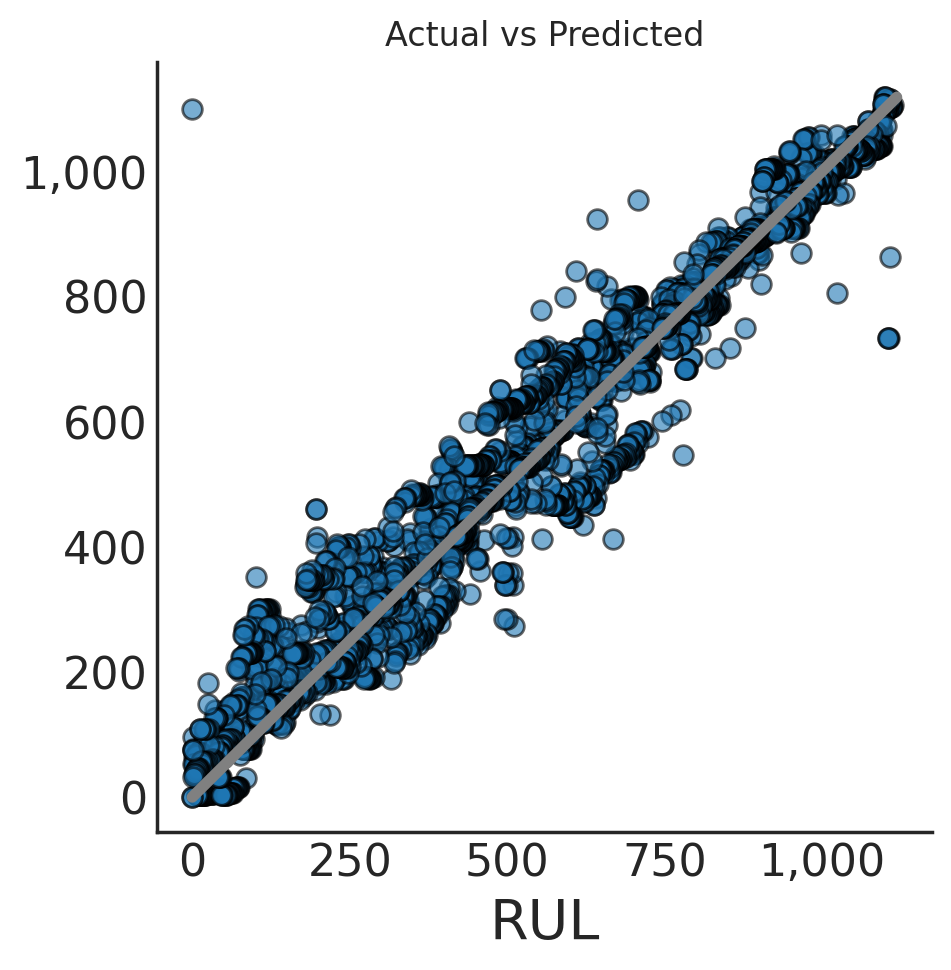

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Matplotlib style
plt.style.use('seaborn-v0_8-white')  # ✅ Fix: Use a valid style name
plt.rcParams['figure.figsize'] = (5, 5)  # ✅ Fix: Tuple format
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

# Create plot
fig, ax = plt.subplots()
plt.title('Actual vs Predicted')

# Scatter plot of Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_predictions, s=50, alpha=0.6,
                linewidth=1, edgecolor='black', ax=ax)

# 1:1 Reference line (Perfect Prediction Line)
min_val = np.min([y_test.min(), y_predictions.min()])
max_val = np.max([y_test.max(), y_predictions.max()])
sns.lineplot(x=[min_val, max_val], y=[min_val, max_val],
             linewidth=4, color='gray', ax=ax)

# Format tick labels
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

# Remove top & right spines for a clean look
sns.despine()

plt.show()


<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np  # ✅ Import for square root calculation

# Start timer
start = time.time()

# Train Random Forest Model
model = RandomForestRegressor(n_jobs=-1,
                              n_estimators=100,
                              min_samples_leaf=1,
                              max_features='sqrt',
                              bootstrap=True,
                              criterion='squared_error'  # ✅ Fix: Use 'squared_error' instead of 'mse'
                             ).fit(X_train, y_train)

# End training time
end_train = time.time()

# Predictions
y_predictions = model.predict(X_test)
end_predict = time.time()

# Compute RMSE manually if `squared` argument is unsupported
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)  # ✅ Manual RMSE calculation

# Store Model Performance
model_performance.loc['Random Forest'] = [
    model.score(X_test, y_test),
    rmse,  # ✅ Using manually calculated RMSE
    end_train - start,
    end_predict - end_train,
    end_predict - start
]

# Print Performance
print('R-squared error: {:.2%}'.format(model.score(X_test, y_test)))
print('Root Mean Squared Error: {:.2f}'.format(rmse))  # ✅ Using manually calculated RMSE


R-squared error: 95.62%
Root Mean Squared Error: 67.42


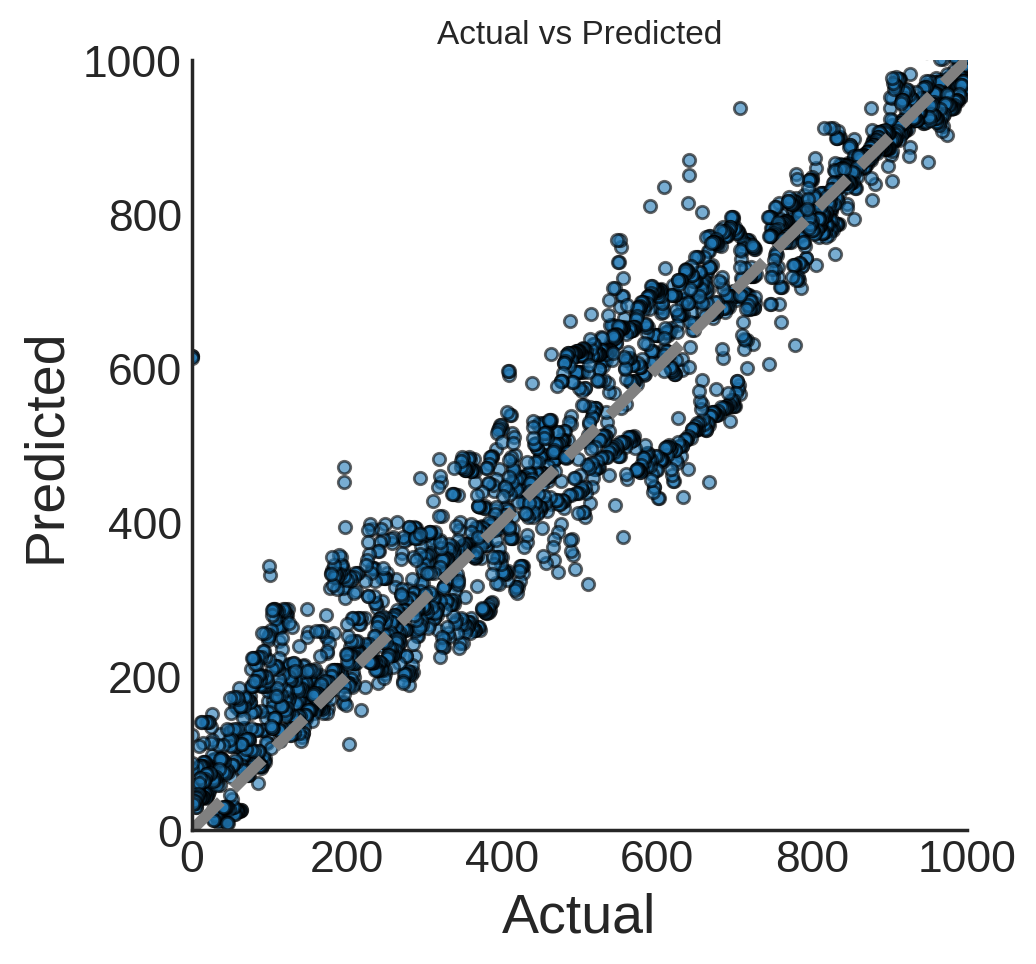

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style
plt.style.use('seaborn-v0_8-white')  # ✅ Use valid style
plt.rcParams['figure.figsize'] = (5, 5)

# Create plot
fig, ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot of Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_predictions, s=20, alpha=0.6,
                linewidth=1, edgecolor='black', ax=ax)

# 1:1 Reference line (Perfect Prediction Line)
ax.plot([0, 1000], [0, 1000], color='gray', linewidth=4, linestyle='--')  # ✅ Reference line from 0 to 1000

# Set RUL range from 0 to 1000 on both axes
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

# Format tick labels
ax.set_xticks(range(0, 1100, 200))  # ✅ Set ticks at 0, 200, 400, ..., 1000
ax.set_yticks(range(0, 1100, 200))
ax.set_xticklabels([str(x) for x in ax.get_xticks()])
ax.set_yticklabels([str(x) for x in ax.get_yticks()])

# Remove top & right spines for a clean look
sns.despine()

plt.show()


<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#D73B3E; border-radius:5px; font-size:100%"> <b>XGBoost</b>


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Ensure X_train and X_test are 2D
X_train = np.array(X_train).reshape(-1, X_train.shape[-1])
X_test = np.array(X_test).reshape(-1, X_test.shape[-1])

# Train XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=500,
                             learning_rate=0.05,
                             max_depth=6,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             random_state=42)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Performance
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Print Results
print(f"🔹 XGBoost R² Score: {r2_xgb:.2%}")
print(f"🔹 XGBoost RMSE: {rmse_xgb:.2f}")


🔹 XGBoost R² Score: 91.44%
🔹 XGBoost RMSE: 94.31


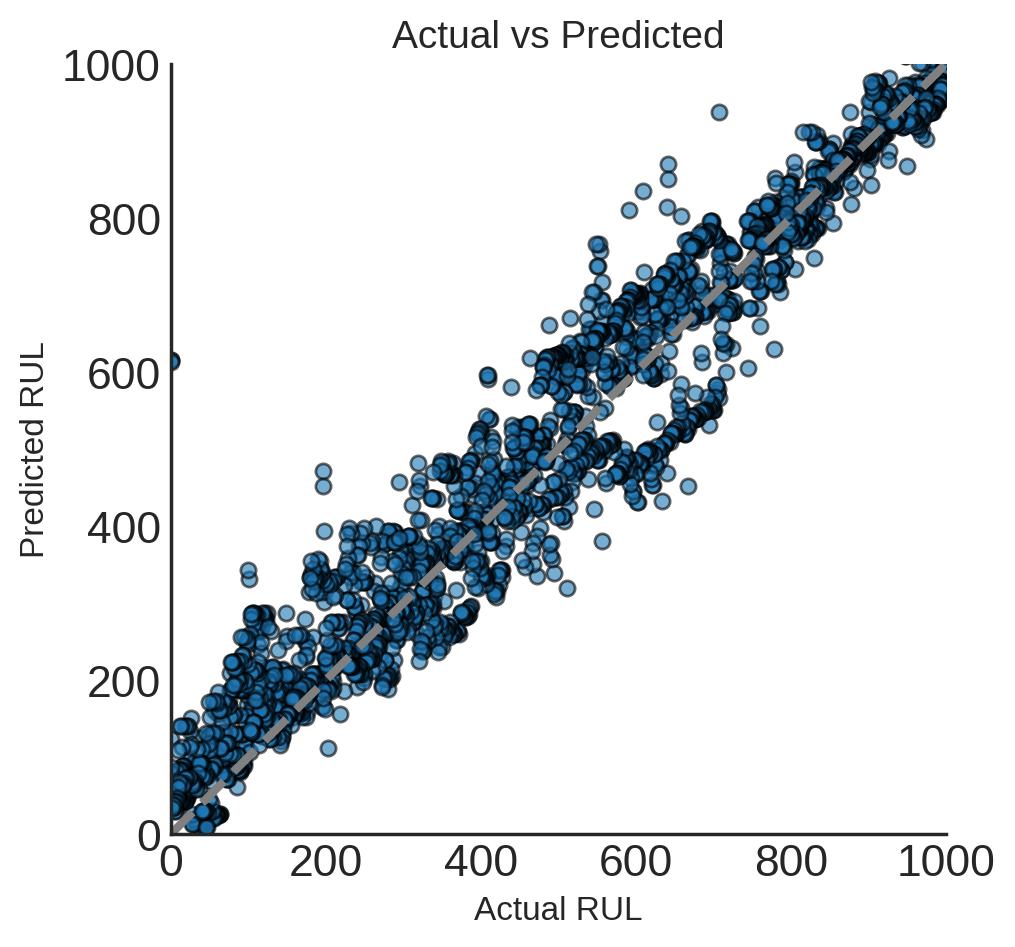

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style
plt.style.use('seaborn-v0_8-white')  # ✅ Updated valid style
plt.rcParams['figure.figsize'] = (5, 5)

# Create plot
fig, ax = plt.subplots()
plt.title('Actual vs Predicted', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)

# Scatter plot of Actual vs Predicted values
sns.scatterplot(x=y_test, y=y_predictions, s=30, alpha=0.6,
                linewidth=1, edgecolor='black', ax=ax)

# 1:1 Reference line (Perfect Prediction Line)
ax.plot([0, 1000], [0, 1000], color='gray', linewidth=3, linestyle='--')  # ✅ Reference line from 0 to 1000

# Set limits from 0 to 1000 on both axes
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)

# Format tick labels
ax.set_xticks(range(0, 1100, 200))  # ✅ Set ticks at 0, 200, 400, ..., 1000
ax.set_yticks(range(0, 1100, 200))
ax.set_xticklabels([str(x) for x in ax.get_xticks()])
ax.set_yticklabels([str(x) for x in ax.get_yticks()])

# Remove top & right spines for a clean look
sns.despine()

plt.show()


<a id='4_3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#3B82F6; border-radius:5px; font-size:100%"> <b>LSTM</b>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset (modify the path accordingly)
df = pd.read_csv('/content/Battery_RUL.csv')

# Define features & target variable
features = df.drop(columns=['RUL'])  # Drop target
target = df['RUL']

# Normalize data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape input for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
# LSTM Model
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,665 (475.25 KB)

 Trainable params: 121,665 (475.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 236601.2500 - mae: 384.6909 - val_loss: 4619.0688 - val_mae: 36.1178
Epoch 2/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 7646.5186 - mae: 64.0896 - val_loss: 1465.6377 - val_mae: 24.3160
Epoch 3/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 5088.5684 - mae: 53.0930 - val_loss: 858.3520 - val_mae: 15.7148
Epoch 4/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 4544.2026 - mae: 49.0944 - val_loss: 906.1066 - val_mae: 18.4727
Epoch 5/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4019.3518 - mae: 45.5448 - val_loss: 660.1384 - val_mae: 12.3319
Epoch 6/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3936.0913 - mae: 44.2260 - val_loss: 812.4272 - val_mae: 15.9215
Epoch 7/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4077.5098 - mae: 45.4431 - val_loss: 859.2858 - val_mae: 19.7759
Epoch 8/50
754/754 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3819.7793 - mae: 43.5554 - val_loss: 524.7310 - val_mae: 

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f'R² Score: {r2:.2%}')  # Convert to percentage
print(f'RMSE: {rmse:.2f}')


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R² Score: 93.27%
RMSE: 83.50


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


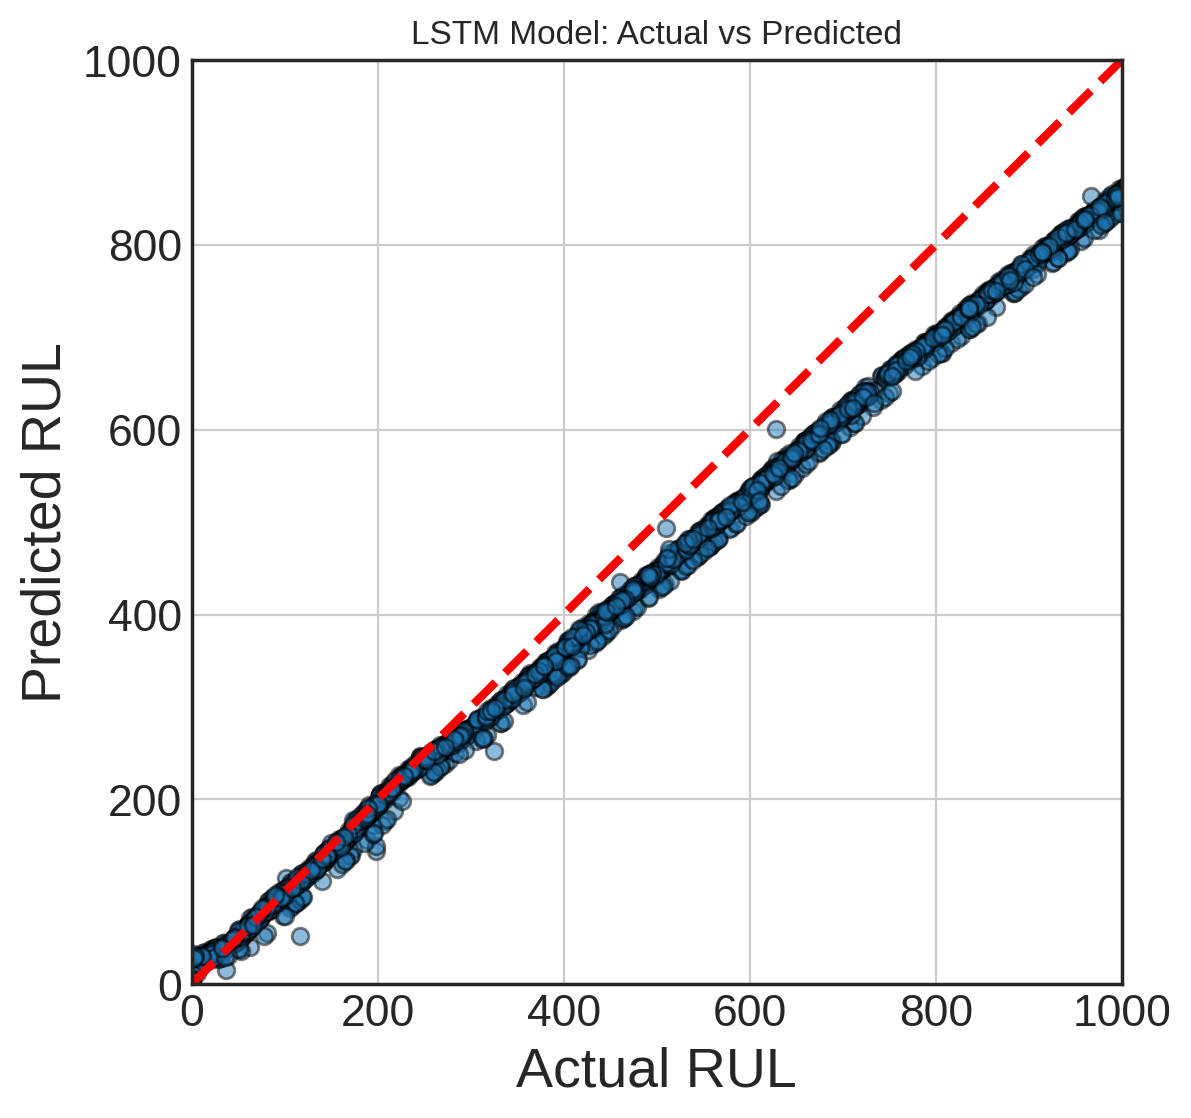

In [ ]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='black')
plt.plot([0, 1000], [0, 1000], 'r--')  # Perfect prediction line
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("LSTM Model: Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
df_test['RUL predicted'] = y_predictions

In [ ]:
plt.style.use("ggplot")  # Use an available style


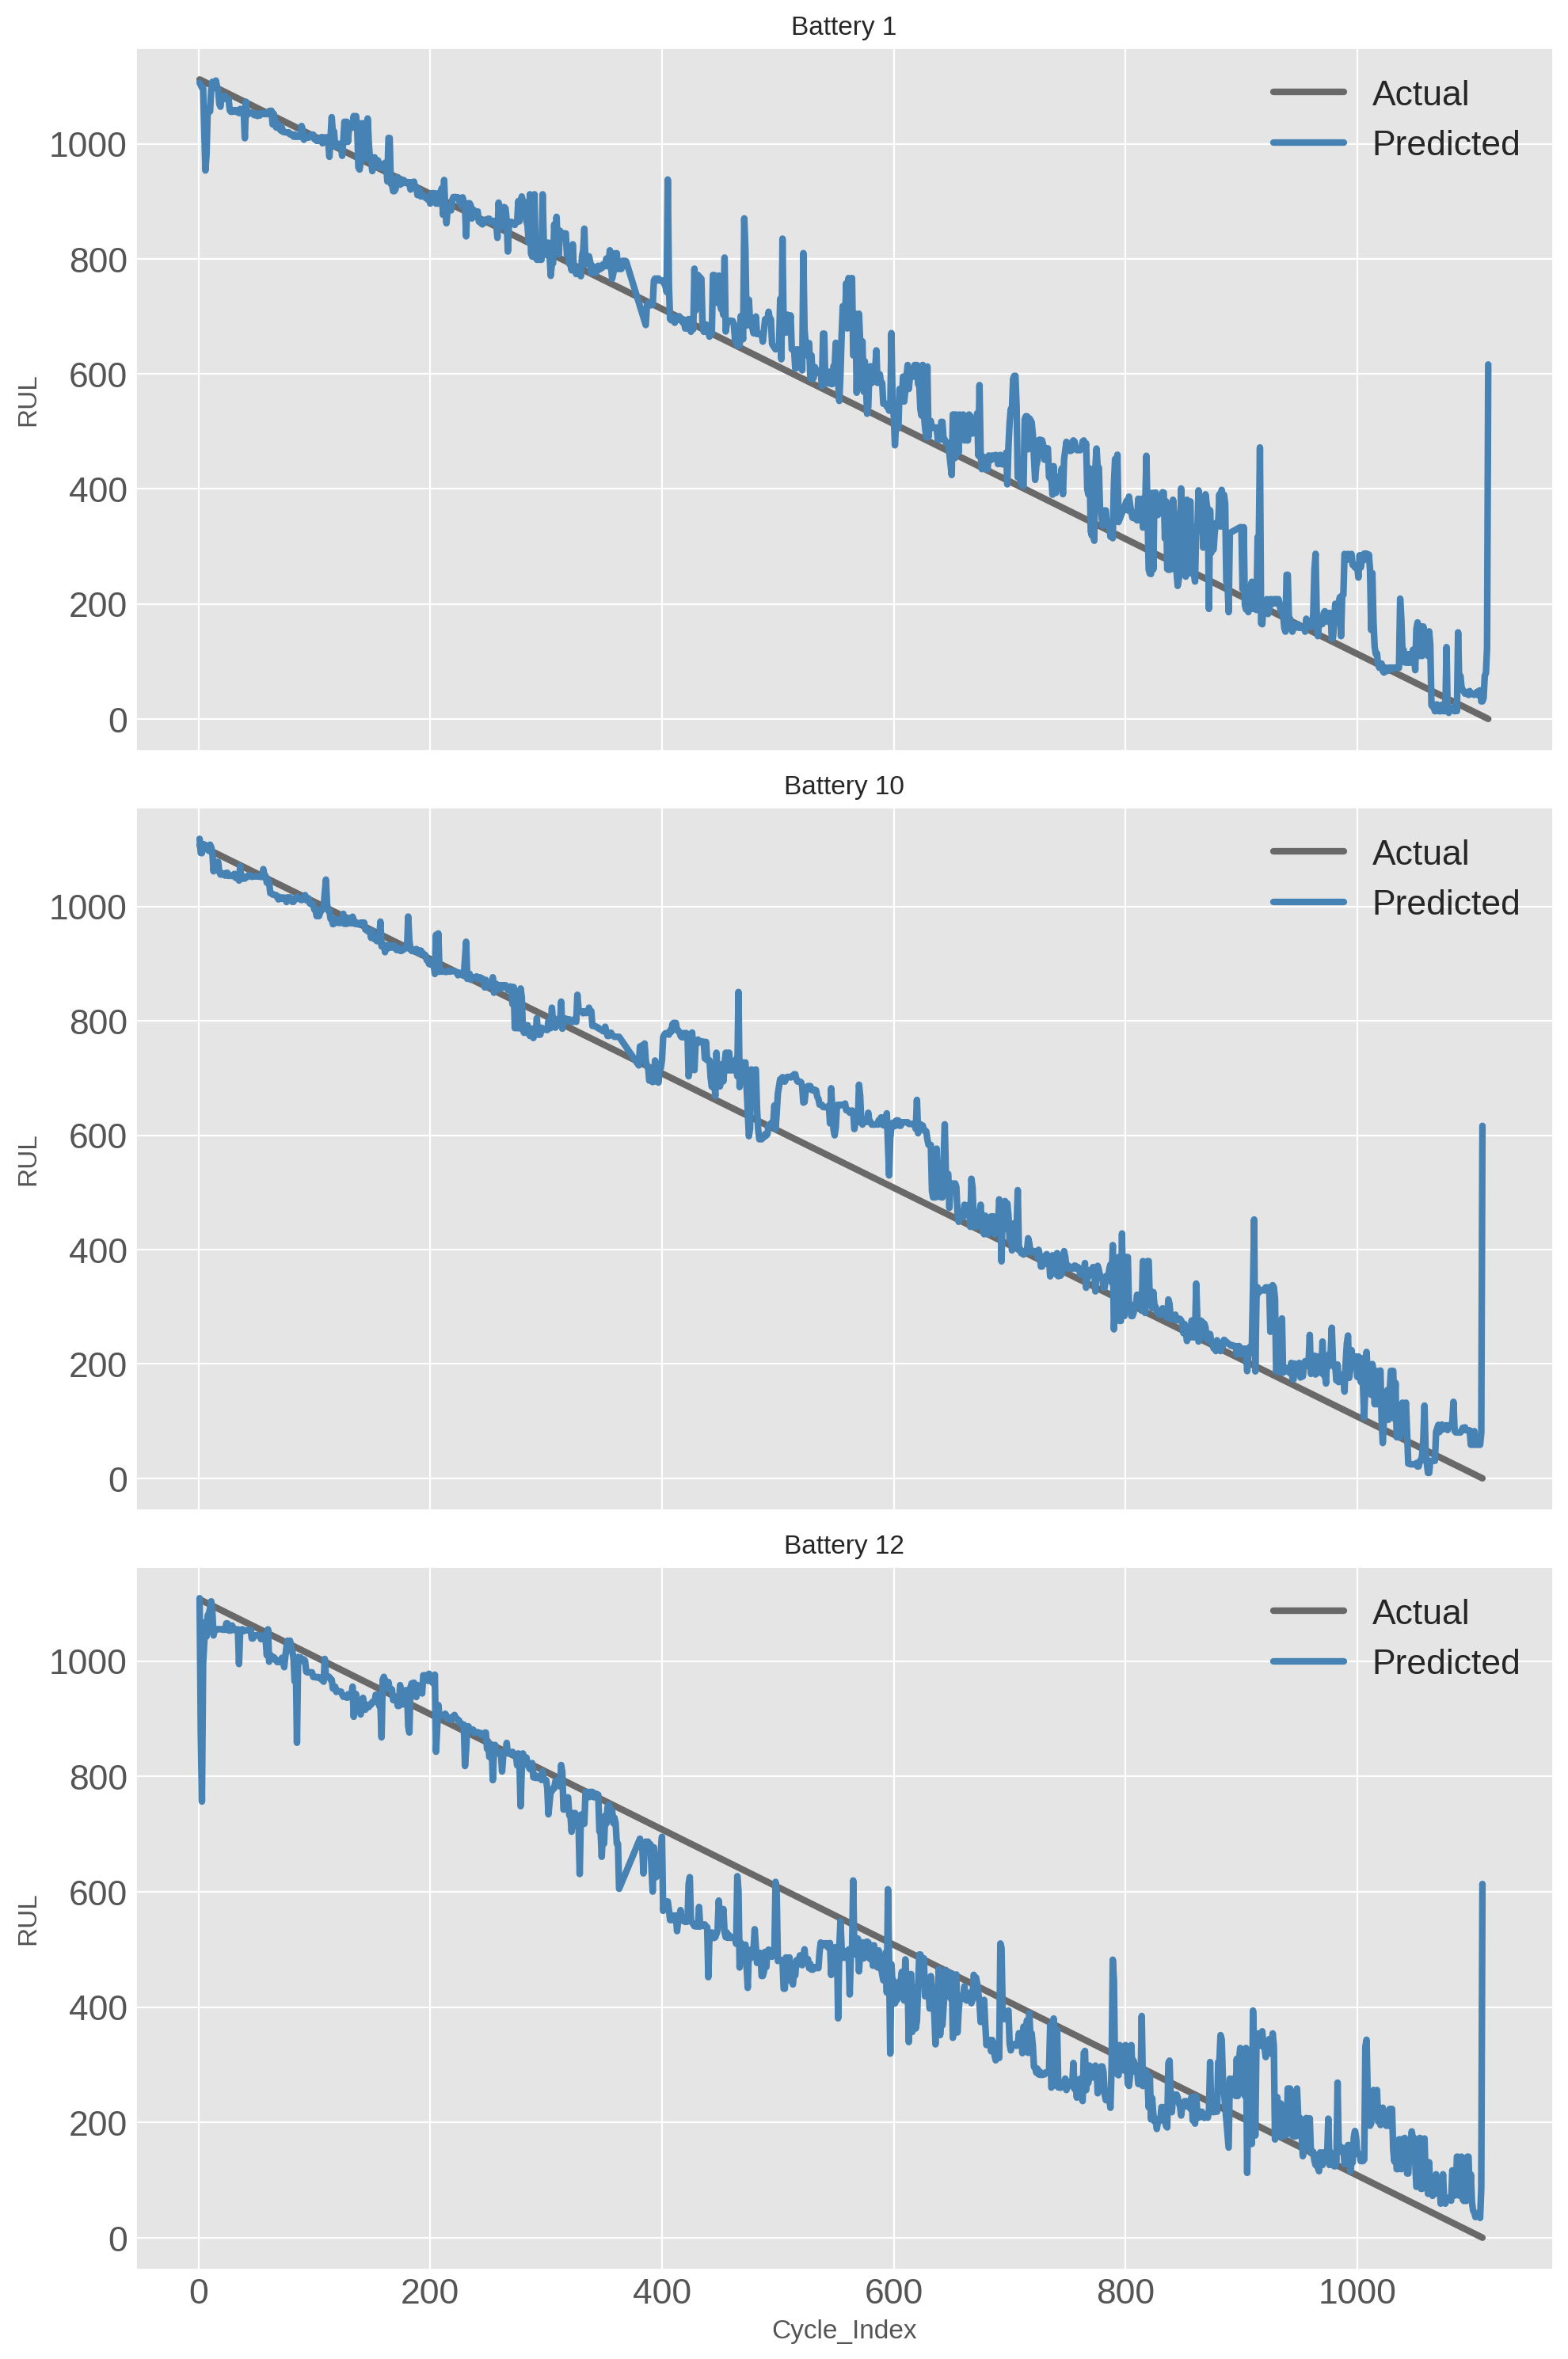

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid Matplotlib style
plt.style.use("ggplot")

# Get unique Battery IDs from test dataset
batteries_test = list(df_test['Battery ID'].unique())

# Ensure only batteries with data are selected
valid_batteries = [b for b in batteries_test if not df_test[df_test['Battery ID'] == b].empty]

# Select the first 6 valid batteries
valid_batteries = valid_batteries[:6]

# Create subplots based on available batteries
fig, ax = plt.subplots(nrows=len(valid_batteries), sharex=True, figsize=(10, len(valid_batteries) * 5))

# Ensure ax is always a list (even if there's only one battery)
if len(valid_batteries) == 1:
    ax = [ax]

# Plot Actual vs Predicted RUL for each battery
for i, battery in enumerate(valid_batteries):
    data = df_test[df_test['Battery ID'] == battery]

    sns.lineplot(data=data, x='Cycle_Index', y='RUL', color='dimgray', ax=ax[i], label='Actual')
    sns.lineplot(data=data, x='Cycle_Index', y='RUL predicted', color='steelblue', ax=ax[i], label='Predicted')

    ax[i].legend()
    ax[i].set_title(f"Battery {battery}", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Assuming your model is called 'model'
joblib.dump(model, 'battery_rul_model.pkl')


['battery_rul_model.pkl']

In [ ]:
# Assuming your model is called 'model'
model.save('battery_rul_model.h5')
